First we will load a 100 images to test the preprocessing speed

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage
import glob 
import os 
import random
import numpy as np
import pandas as pd
from PIL import ImageFile
from sklearn.model_selection import train_test_split

#what is the role of truncated images?
ImageFile.LOAD_TRUNCATED_IMAGES = True



In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, Sequential, models
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.applications import efficientnet, vgg16

The preprocessing below works. It has been commented out to replace it with a better one. 

In [3]:
def preprocess_image(image):
    resized = cv.resize(image,(300,300),interpolation = cv.INTER_AREA)
    img = cv.medianBlur(resized,5)
    ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
    th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,15,2)
    images = [th1, th2, th3, img]

    
    return images
    

In [3]:
# def preprocess_image(image,reshape_size):
#     if image.shape == (570, 1015, 4):
#         image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
#         cropped = image[250:-100,100:]
#         resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
#         gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
#         edges = cv.Canny(gray_img,50,50)
#         gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,13,3)
#         (T, thresh1) = cv.threshold(resized, 0.4, 0.6,
#                             cv.THRESH_BINARY_INV)
#         (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
#         images = [edges, gaussian, thresh1, thresh]
#         return images
    
#     elif image.shape == (582, 1034, 4):
#         image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
#         cropped = image[60:500,:]
#         resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
#         gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
#         edges = cv.Canny(gray_img,50,50)
#         gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,13,3)
#         (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
#                             cv.THRESH_BINARY_INV)
#         (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
#         images = [edges,gaussian,thresh1,thresh]
#         return images
    
#     elif image.shape == (624, 1200, 4):
#         image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
#         cropped = image[150:,:]
#         resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
#         gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
#         edges = cv.Canny(gray_img,100,100)
#         gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,11,3)
#         (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
#                             cv.THRESH_BINARY_INV)
#         (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
#         images = [edges,gaussian,thresh1,thresh]
#         return images
    
#     elif image.shape == (624, 1110, 4):
#         image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
#         cropped = image[350:-170,:]
#         resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
#         gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
#         edges = cv.Canny(gray_img,50,250)
#         gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,9,5)
#         (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
#                             cv.THRESH_BINARY_INV)
#         (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
#         images = [edges,gaussian,thresh1,thresh]
#         return images

In [15]:
X = []
y = []
idx = 0


for root , dirs , files in os.walk("raw_data"):
    if dirs:
        parent = root
        folders = dirs
        print(folders)

    if files:
        print(f"Preprocessing folder {folders[idx]}...")
        for file in np.random.choice(np.array(files),len(files), replace = False):
            try:
                original_image = cv.imread(os.path.join(parent , folders[idx], file),0)
                processed_image = preprocess_image(original_image)
                X.append(processed_image)
                y.append(idx)
                #dimensions checking
               
            
            except Exception as e:
                print("Detected bad image!")
                continue
        
        idx += 1
        
X = np.array(X)
y = np.array(y)
X.shape , y.shape

['Flat', 'Chaotic', 'Good']
Preprocessing folder Flat...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Detected bad image!
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Preprocessing folder Chaotic...
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
Detected bad image!
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
Preprocessing folder Good...
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


((524, 4, 300, 300), (524,))

In [9]:
X.shape

(0,)

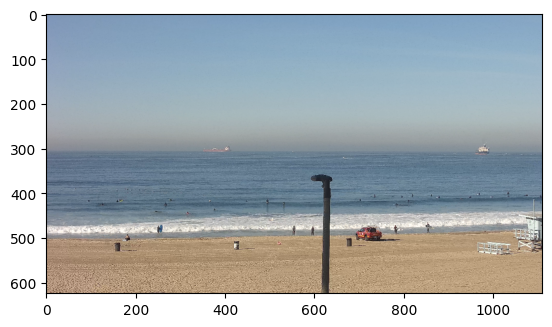

In [22]:
plt.imshow(tes)

In [28]:
os.walk("../raw_data")

<generator object _walk at 0x1202ee490>

In [29]:
!pwd

/Users/nicolasmartinez-geijovila/code/IamjustNick/wavewatcher/notebooks


The code below is a clue from Nicole about what can we do to fix X shape.

In [ ]:
np.append( np.array([[1,2,3],[3,4,5]]) , np.array([[1,2,3],[2,3,4]]) ,axis = 0).reshape(2,2,3)

array([[[1, 2, 3],
        [3, 4, 5]],

       [[1, 2, 3],
        [2, 3, 4]]])

In [18]:
X.shape

(524,)

Let's augment the little data we have. Considering the nature of the data heavy rotations are not advised.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    #I added brightness changes, I think they are relevant to our task
    brightness_range =(0.5,1)
    ) 

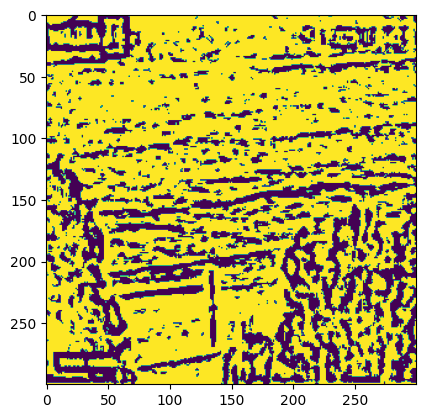

In [ ]:
plt.imshow(X[1][1])

In [ ]:
# INPUT_SHAPE = (4, 250, 250)
NUMBER_CLASSES = 3

In [ ]:
X.shape

(524, 4, 300, 300)

In [16]:

#NORMALIZE
X= X/255

In [17]:
X.shape
y_cat = to_categorical(y)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30)

The model below works with the first preprocessing, there seem to be some serious issues when trying to apply any kind of max pooling though.

In [24]:
def initialize_basic():
    #Create an empty template
    model = models.Sequential()
    
    model.add(layers.Conv2D(64, (3,3), input_shape= (4,300,300), padding='same', activation="relu"))
    
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(3, activation = "softmax"))
    return model


In [25]:
def compile_model(model, learning_rate=1e-4):
    model.compile(loss = "categorical_crossentropy",
                            optimizer = Adam(learning_rate=learning_rate),
                            metrics = ["accuracy"])
    return model

In [26]:
test_model = initialize_basic()

In [27]:
compile_model(test_model)


In [28]:
es = EarlyStopping(patience = 3,restore_best_weights= True)
test_model.fit(X_train , y_train ,callbacks = [es] ,validation_split = 0.2, epochs = 64, batch_size = 64)

Epoch 1/64


2022-11-29 22:55:37.889638: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 2s 315ms/step - loss: 1.2340 - accuracy: 0.3664 - val_loss: 1.1460 - val_accuracy: 0.4324
Epoch 2/64
5/5 [==============================] - 1s 273ms/step - loss: 1.0676 - accuracy: 0.4144 - val_loss: 1.0277 - val_accuracy: 0.5676
Epoch 3/64
5/5 [==============================] - 1s 277ms/step - loss: 1.0132 - accuracy: 0.4966 - val_loss: 1.0101 - val_accuracy: 0.5946
Epoch 4/64
5/5 [==============================] - 1s 250ms/step - loss: 0.9165 - accuracy: 0.6062 - val_loss: 0.9768 - val_accuracy: 0.5946
Epoch 5/64
5/5 [==============================] - 1s 262ms/step - loss: 0.8293 - accuracy: 0.6884 - val_loss: 0.8900 - val_accuracy: 0.6216
Epoch 6/64
5/5 [==============================] - 1s 275ms/step - loss: 0.7632 - accuracy: 0.6986 - val_loss: 0.8479 - val_accuracy: 0.6081
Epoch 7/64
5/5 [==============================] - 1s 252ms/step - loss: 0.7297 - accuracy: 0.7055 - val_loss: 0.8200 - val_accuracy: 0.6757
Epoch 8/64
5/5 [===============

In [29]:
test_model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 47ms/step - loss: 0.8158 - accuracy: 0.6646


[0.8158105611801147, 0.6645569801330566]

In [38]:
def initialize_improved():
    #Create an empty template
    model = models.Sequential()
    
    model.add(layers.Conv2D(64, (3,3), input_shape= (4,300,300), padding='same', activation="relu"))
    #Max pooling layers have been creating some problems. I am playing with the padding argument to solve the dimensions issue.
    #model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    model.add(layers.MaxPool2D(pool_size=(2,2),padding="valid"))
    #Second convolutional layer 
    model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    
    model.add(layers.Flatten())
    
    #Deep learning layers
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(32, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(3, activation = "softmax"))
    return model

def compile_model(model, learning_rate=1e-4):
    model.compile(loss = "categorical_crossentropy",
                            optimizer = Adam(learning_rate=learning_rate),
                            metrics = ["accuracy"])
    return model


In [39]:
improved_model = initialize_improved()
compile_model(improved_model)

In [40]:
es = EarlyStopping(patience = 3,restore_best_weights= True)
improved_model.fit(X_train , y_train ,callbacks = [es] ,validation_split = 0.2, epochs = 64, batch_size = 64)

Epoch 1/64
5/5 [==============================] - 2s 304ms/step - loss: 1.1605 - accuracy: 0.3390 - val_loss: 1.0945 - val_accuracy: 0.4189
Epoch 2/64
5/5 [==============================] - 1s 256ms/step - loss: 1.0978 - accuracy: 0.3527 - val_loss: 1.1019 - val_accuracy: 0.4189
Epoch 3/64
5/5 [==============================] - 1s 262ms/step - loss: 1.0681 - accuracy: 0.4486 - val_loss: 1.0804 - val_accuracy: 0.3784
Epoch 4/64
5/5 [==============================] - 1s 255ms/step - loss: 1.0124 - accuracy: 0.5240 - val_loss: 1.1022 - val_accuracy: 0.4324
Epoch 5/64
5/5 [==============================] - 1s 255ms/step - loss: 0.9834 - accuracy: 0.5342 - val_loss: 1.0588 - val_accuracy: 0.4730
Epoch 6/64
5/5 [==============================] - 1s 266ms/step - loss: 0.9312 - accuracy: 0.6027 - val_loss: 1.0535 - val_accuracy: 0.4459
Epoch 7/64
5/5 [==============================] - 1s 290ms/step - loss: 0.8904 - accuracy: 0.6267 - val_loss: 1.0337 - val_accuracy: 0.4730
Epoch 8/64
5/5 [====

In [41]:
improved_model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 49ms/step - loss: 0.8050 - accuracy: 0.6266


[0.8050152063369751, 0.6265822649002075]

In [66]:
test_image  = cv.imread("test_images/test_5.png",0)


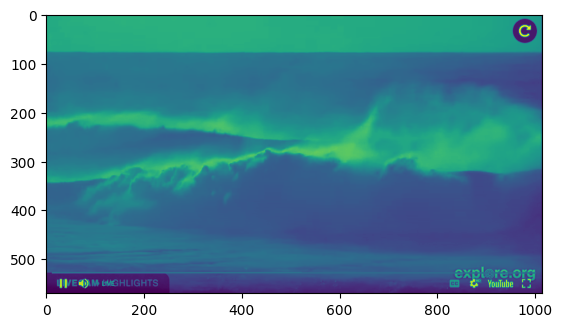

In [67]:
plt.imshow(test_image)

In [ ]:
X.shape

(524, 4, 300, 300)

In [ ]:
test_image.shape

(900, 1200)

(4, 300, 300)

In [68]:
test_image = preprocess_image(test_image)


In [69]:
test_image = np.array([(test_image)])

In [70]:
test_image = test_image/255

In [ ]:
test_image.shape

(1, 4, 300, 300)

In [71]:
test_model.predict(test_image)

1/1 [==============================] - 0s 15ms/step


array([[0.01478173, 0.9210626 , 0.06415571]], dtype=float32)

In [72]:
improved_model.predict(test_image)

1/1 [==============================] - 0s 14ms/step


array([[0.01975967, 0.9450792 , 0.03516113]], dtype=float32)